# Resolution of a Phase-Field problem using PINN : Traveling wave 


## Theory    

The Gibbs free energy of a multi-phase-field (MPF) system could be seen (from a first approach) as a summation of an interfacial free energy density [$J.m^{-3}$] (also called Grain-Boundary (GB)) $f^{GB}$ and a chemical one $f^{chem}$ as follows.  

$F = \int_\Omega f^{GB} + f^{chem}$



The other contributions could be added added to the MPF free energy forumaltuion, such as the mechanical ($f^{chem}$) and magnetic ones.

$f^{GB} = \sum _{\alpha,\beta=1..N,\alpha > \beta} \frac{4\sigma_{\alpha\beta}}{\eta} \Bigm\{ -\frac{\eta^2}{\pi^2} \nabla\phi_\alpha \cdot \nabla\phi_\beta  + \phi_\alpha \phi_\beta \Bigm\}$

 $\phi_\alpha$ is is the non-conservative phase-field variable corresponding to the phase $\alpha$ (idem for $\beta$), N is the number of components/crysals present in the system, $\sigma_{\alpha\beta}$ is the interfacial energy while $\eta$ is the intrface width.     

For a system with two-phases (binary), the previous expression becomes:

$f^{GB} =  \frac{4\sigma_{}}{\eta} \Bigm\{ -\frac{\eta^2}{\pi^2} \nabla\phi_ \cdot \nabla(1-\phi_)  + \phi (1-\phi ) \Bigm\}$

or simply:

$f^{GB} =  \frac{4\sigma_{}}{\eta} \Bigm\{\phi (1-\phi )+ \frac{\eta^2}{\pi^2} (\nabla\phi) ^{2}  \Bigm\}$

Th temporal evolution of the non-conserved order parameter $\phi$ follows the Allen-Cahn formualtion :

$\frac{\partial \phi}{\partial t}=-L. \frac{\delta F}{\delta \phi}$

where $L$ is the kinetic coefficient of the interface.

in 1D, for a dual interface ($f^{GB}$ is noted hereafter $f^{int}$), when considereing only the interfacial energy $F = \int_\Omega f^{int} dx$, the AC formulation gives:

$\frac{\partial \phi}{\partial t}=-L \Bigm\{ \frac{\partial f^{int}}{\partial \phi} - \nabla \cdot \frac{\partial f^{int}}{\partial (\nabla \phi)} \Bigm\}$

$\frac{\partial \phi}{\partial t} = L \Bigg( \frac{4\sigma}{\eta} \bigg[ (2\phi - 1 )+ 2 \frac{\eta^2}{\pi^2} \nabla^2 \phi \bigg] \Bigg)$

This expression could be also expressed as :

$\dot{\phi}=\mu \sigma\left(\nabla^2 \phi+\frac{\pi^2}{2 \eta^2}(2 \phi-1)\right)$

where: $\mu=\frac{8\eta L}{\pi^{2}} $

$[\mu] = \frac{\text{L}^4}{\text{T}}E $   : $    {m}^4{J}^{-1}{s}^{-1}$

$[\sigma] = \frac{\text{E}}{\text{L}^2}$  : $    {J}^{}{m}^{-2}$

$[L] =  {m}^3{J}^{-1}{s}^{-1}$

We should note that the previous developements concern only the interface contrubution. However, in order to garantee a moving interface, the non interfacial contributions should be taken into account: 

$f^{dual}=f^{int} + h(\phi) \Delta g$

$[\Delta g] =  {m}{s}^{-1}$


where $h(\phi)$ is a coupling function between $0$ and $1$ monotonous in $\phi$ in the range between $0$ and $1$ chosen in order to ensure a traveling wave solution. 
$\Delta g$ corresponds to the non-interfacial free enegry densities. 


$h(\phi) = \frac1\pi[(4\phi-2)\sqrt{\phi(1-\phi)} + arcsin(2\phi-1)]$

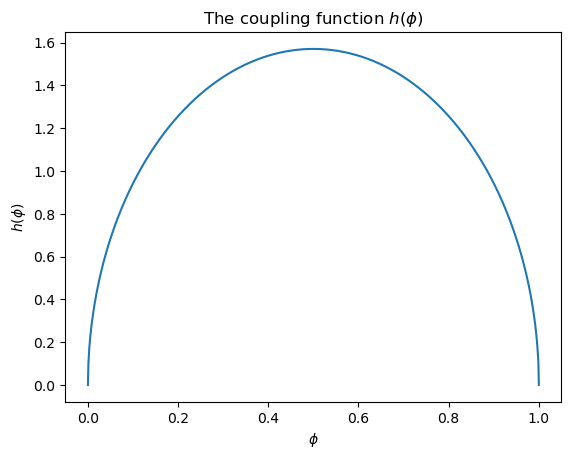

In [9]:

# Define the function h(phi)
def h(phi):
    return (1/np.pi) * ((4*phi-2) * np.sqrt(phi*(1-phi)) + np.arcsin(2*phi-1))

# Create an array of phi values between 0 and 1
phi_values = np.linspace(0, 1, 1000)

# Evaluate the function h(phi) for the phi values
h_values = h(phi_values)

# Plot h(phi) as a function of phi
plt.plot(phi_values, h_values)
plt.xlabel('$\phi$')
plt.ylabel('$h(\phi)$')
plt.title('The coupling function $h(\phi)$')
plt.show()


$\frac\partial  {\partial\phi} h(\phi) = \frac8\pi \sqrt{\phi(1-\phi)}$

### Main equation

$\Rightarrow$ The evolution of the order parameter with respect to time is described by this equation: 

$\dot{\phi}=\mu  \left[ \sigma \left(\nabla^2 \phi+\frac{\pi^2}{2 \eta^2}(2\phi-1)\right) +h(\phi) \Delta g \right] $

where the left side descrive the interfacial changes while the right one controls the moving of the interface

### Plot of the analatyical solution

In order to validate a first PINN solution using AC, we take first the exact solution in 1D:

\begin{equation}
\phi(x, t)=\left\{\begin{array}{lll}
1 & \text { for } & x<v_n t-\frac{\eta}{2} \\
\frac{1}{2}-\frac{1}{2} \sin \left(\frac{\pi}{\eta}\left(x-v_n t\right)\right) & \text { for } & v_n t-\frac{\eta}{2} \leq x<v_n t+\frac{\eta}{2} \\
0 & \text { for } & x \geq v_n t+\frac{\eta}{2}
\end{array}\right.
\end{equation}

where $v_n$ is the interface velocity or the velocity of the wave traveling in positive x direction

$\nabla^{2} \phi=\frac{\pi^2}{2\eta^2}\sin\left(\frac{\pi(r-\mathrm{R_0})}{\eta}\right) - \frac{\pi}{r\eta}\cos\left(\frac{\pi(r-\mathrm{R_0})}{\eta}\right)$

## Governing equations

$
\frac{\partial \phi}{\partial t} =\mu \left[\sigma \left(\frac{\partial^2 \phi}{\partial x^2} + \frac{\partial^2 \phi}{\partial y^2}\right) + h(\phi) \Delta_g \right] 
$

where $\phi$ is the unknown function, $t$ is the time variable, $x$ and $y$ are the spatial variables, $\mu$, $\sigma$, $\eta$, $R_0$, and $\delta_g$ are constants, and $h(\phi)$ is a function of $\phi$.

right_side_eqn = self.mu * (self.sigma * (lap_phi + phi_term) + self.h(phi) * self.delta_g)

$\phi_{term} = \frac{\pi^2}{2\eta^2}(2\phi - 1)$